# Stock Advsing Models

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Stock data Loading

In [2]:
stock = 'TSLA'
start = datetime.datetime(2021,1, 1)
end = datetime.datetime(2022,8, 1)
tsla_data = yf.download(stock, start=start, end=end, interval= '1d')

[*********************100%%**********************]  1 of 1 completed


In [3]:
tsla_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500
...,...,...,...,...,...,...
2022-07-25,272.216675,274.146667,267.399994,268.433319,268.433319,64073400
2022-07-26,266.513336,267.309998,256.263336,258.859985,258.859985,66820800
2022-07-27,263.809998,275.926666,261.790009,274.820007,274.820007,88110000


In [4]:
tsla_close = tsla_data['Close']

In [5]:
# First Difference
diff_tsla =tsla_close.diff().dropna()
diff_tsla

Date
2021-01-05     1.779999
2021-01-06     6.956665
2021-01-07    20.020004
2021-01-08    21.326660
2021-01-11   -22.943329
                ...    
2022-07-25    -3.810028
2022-07-26    -9.573334
2022-07-27    15.960022
2022-07-28     6.079987
2022-07-29    16.250000
Name: Close, Length: 395, dtype: float64

## EDA

<Axes: xlabel='Date'>

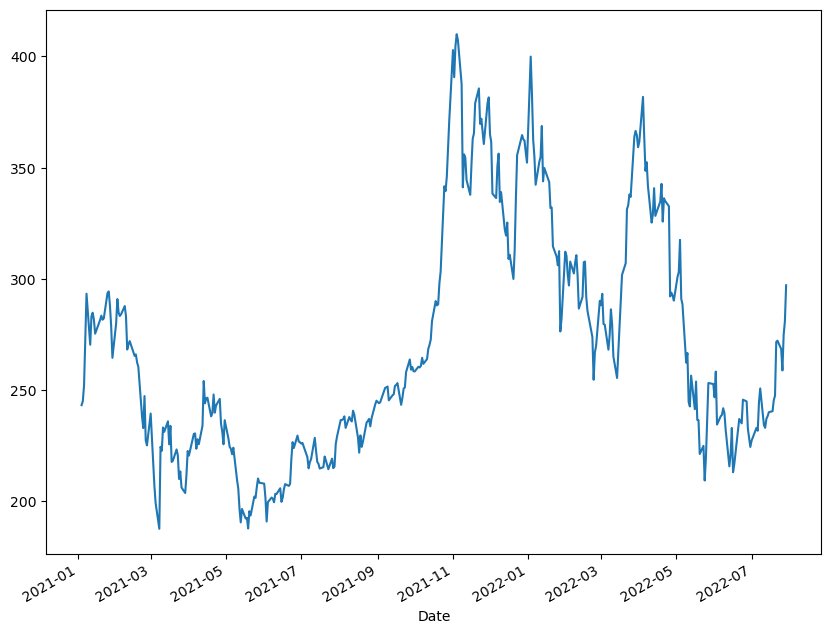

In [7]:
tsla_close.plot()

# ML Models

## LSTM model

### Importing Libraries

In [50]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM

### Data Processing

In [51]:
data = tsla_data

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])

# Create sequences of data for training the LSTM
def create_sequences(data, timestep):
    X, y = [], []
    for i in range(len(data) - timestep):
        X.append(data[i:(i + timestep), 0])
        y.append(data[i + timestep, 0])
    return np.array(X), np.array(y)

timestep = 60  # Number of previous time steps to consider
X, y = create_sequences(data_scaled, timestep)

# Reshape the data for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Make predictions on new data (you may need to adjust this part based on your data)
test_data = data.tail(timestep)  # Use the last 'timestep' data points for testing
input_data = scaler.transform(test_data[['Close']])
input_data = np.reshape(input_data, (1, timestep, 1))
predicted_price = model.predict(input_data)

# Inverse transform the predicted price to the original scale
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted Stock Price:", predicted_price)

Epoch 1/10
11/11 [==============================] - 2s 26ms/step - loss: 0.0832
Epoch 2/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0290
Epoch 3/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0207
Epoch 4/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0183
Epoch 5/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0158
Epoch 6/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0158
Epoch 7/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0132
Epoch 8/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0125
Epoch 9/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0117
Epoch 10/10
1/1 [==============================] - 0s 332ms/step
Predicted Stock Price: [[267.20374]]


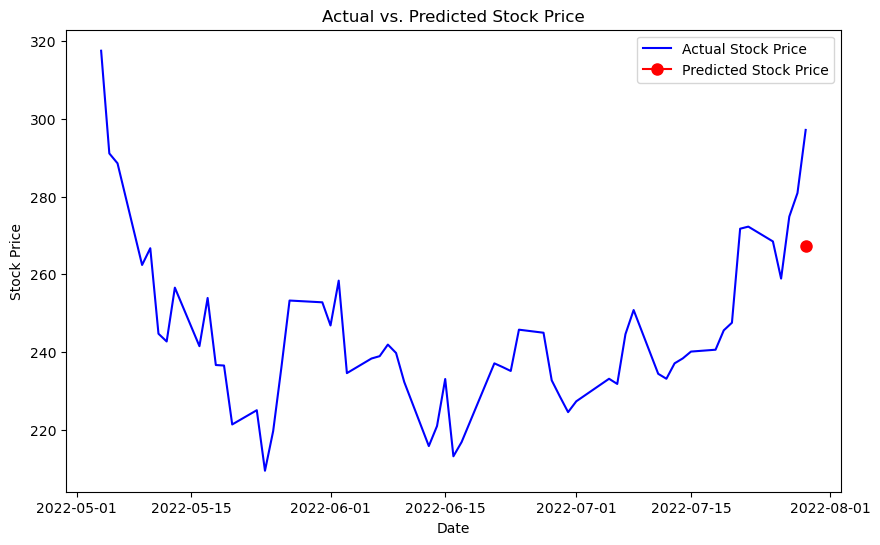

In [52]:
# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Stock Price', color='blue')
plt.plot(test_data.index[-1], predicted_price[0, 0], marker='o', markersize=8, label='Predicted Stock Price', color='red')
plt.title('Actual vs. Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [54]:
data = tsla_data

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])

# Create sequences of data for training the LSTM
def create_sequences(data, timestep):
    X, y = [], []
    for i in range(len(data) - timestep):
        X.append(data[i:(i + timestep), 0])
        y.append(data[i + timestep, 0])
    return np.array(X), np.array(y)

timestep = 60  # Number of previous time steps to consider
X, y = create_sequences(data_scaled, timestep)

# Reshape the data for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Make predictions for multiple future prices
num_predictions = 10  # Adjust as needed
future_predictions = []

# Use the last 'timestep' data points for the initial prediction
input_data = data_scaled[-timestep:]
input_data = np.reshape(input_data, (1, timestep, 1))

future_predictions_list = []
for _ in range(num_predictions):
    # Predict the next price
    predicted_price = model.predict(input_data)

    # Inverse transform the predicted prices to the original scale
    future_predictions = scaler.inverse_transform(np.array(predicted_price[0, 0]).reshape(-1, 1))

    future_predictions_list.append(future_predictions)

    # Update input_data for the next prediction
    input_data = np.append(input_data[:, 1:, :], np.reshape(predicted_price, (1, 1, 1)), axis=1)

Epoch 1/10
11/11 [==============================] - 2s 23ms/step - loss: 0.1212
Epoch 2/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0261
Epoch 3/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0194
Epoch 4/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0162
Epoch 5/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0148
Epoch 6/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0139
Epoch 7/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0126
Epoch 8/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0118
Epoch 9/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0119
Epoch 10/10
1/1 [==============================] - 0s 8ms/step


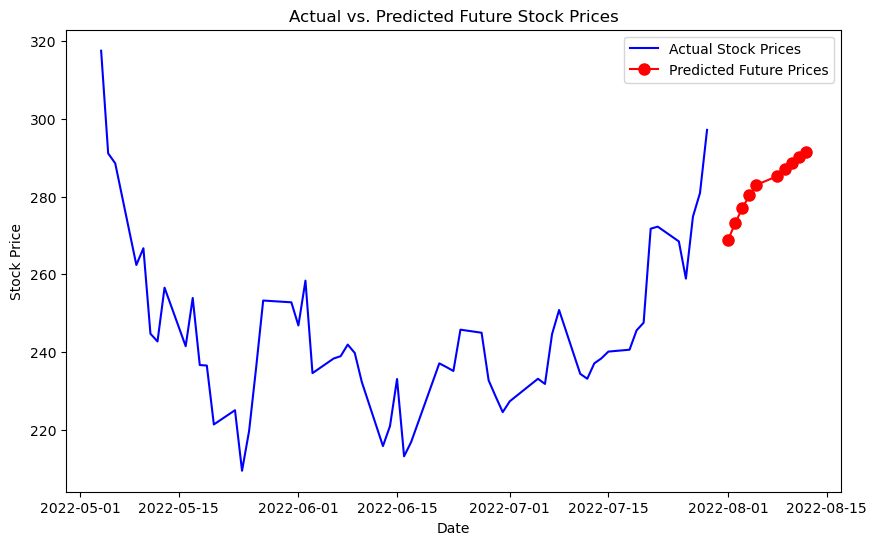

In [55]:
# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[-timestep:], data['Close'].tail(timestep), label='Actual Stock Prices', color='blue')

# Generating future dates for the predicted prices
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(1, 'D'), periods=num_predictions, freq='B')

# Reshape future_predictions_list to 1D array
future_predictions_list = np.array(future_predictions_list).flatten()

plt.plot(future_dates, future_predictions_list, marker='o', markersize=8, label='Predicted Future Prices', color='red')
plt.title('Actual vs. Predicted Future Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


### SMA and EMA

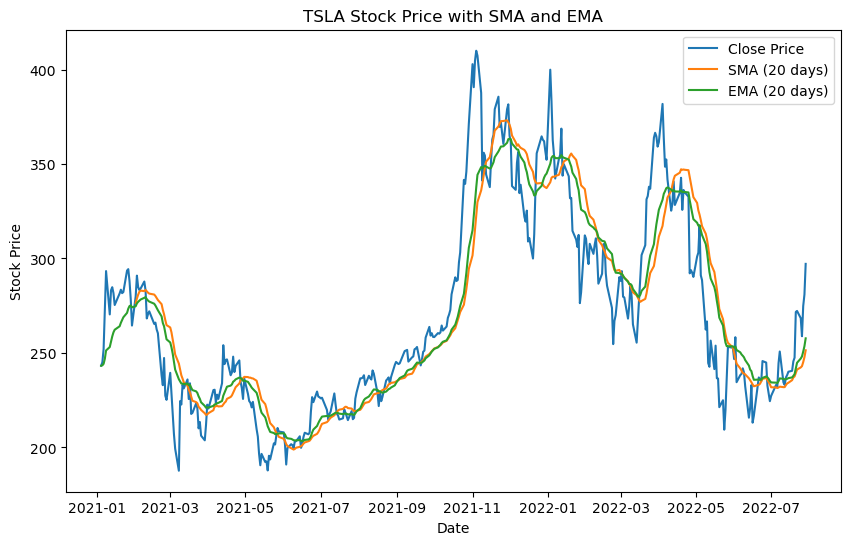

In [58]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

data = tsla_data

# Calculate Simple Moving Average (SMA)
sma_window = 20  # Adjust the window size as needed
data['SMA'] = data['Close'].rolling(window=sma_window).mean()

# Calculate Exponential Moving Average (EMA)
ema_window = 20  # Adjust the window size as needed
data['EMA'] = data['Close'].ewm(span=ema_window, adjust=False).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA'], label=f'SMA ({sma_window} days)')
plt.plot(data['EMA'], label=f'EMA ({ema_window} days)')

plt.title('TSLA Stock Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume 'data' is your historical stock data DataFrame

# Feature engineering: Using the SMA as a feature
data['SMA_shifted'] = data['SMA'].shift(1)

# Drop rows with NaN values resulting from shifting
data = data.dropna()

# Features and target
X = data[['SMA_shifted']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future stock prices
future_data = pd.DataFrame({'SMA_shifted': [data['SMA'].iloc[-1]]})
predicted_prices = model.predict(future_data)

print("Predicted Future Stock Prices:")
print(predicted_prices)


Predicted Future Stock Prices:
[252.37583951]


# Time Series Models

## Prophet

In [64]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [69]:
tsla_close

Date
2021-01-04    243.256668
2021-01-05    245.036667
2021-01-06    251.993332
2021-01-07    272.013336
2021-01-08    293.339996
                 ...    
2022-07-25    268.433319
2022-07-26    258.859985
2022-07-27    274.820007
2022-07-28    280.899994
2022-07-29    297.149994
Name: Close, Length: 396, dtype: float64

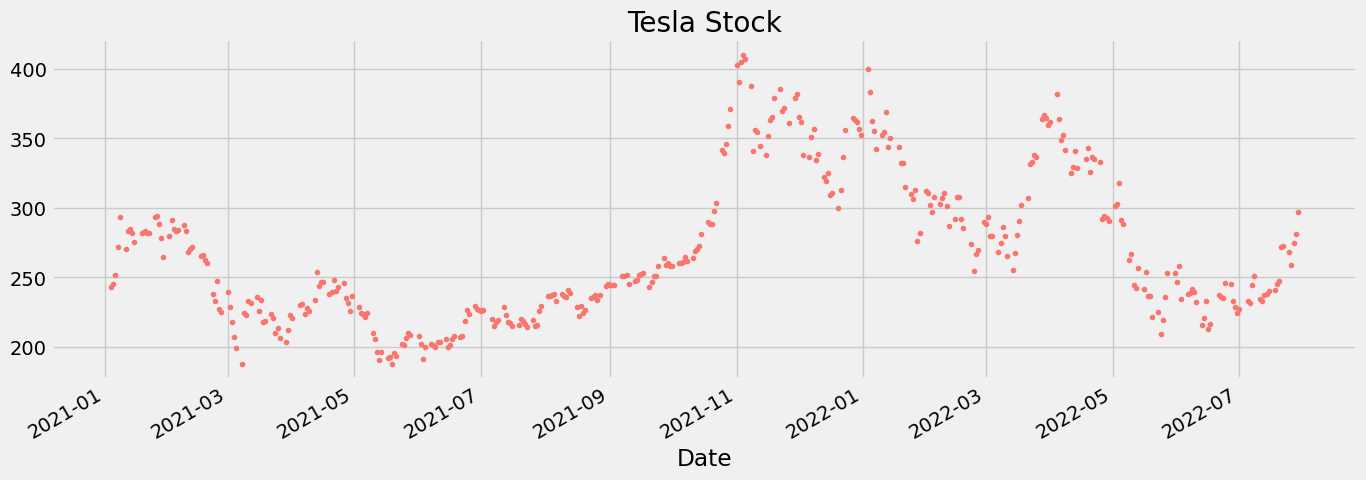

In [70]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
tsla_close.plot(style='.', figsize=(15,5), color=color_pal[0], title='Tesla Stock')
plt.show()

In [71]:
def create_features(df, label=None):
    """
    Creates time series features from the dataframe.
    """
    df = df.copy()

    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week  # Updated to use isocalendar for weekofyear

    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear']]

    if label:
        y = df[label]
        return X, y

    return X,  # Note the comma to create a single-element tuple

In [73]:
# Assuming tsla_data is a Series
tsla_close = tsla_close.to_frame(name='Close')

# Applying the create_features function
X, y = create_features(tsla_close, label='Close')

# If you want to see the resulting DataFrame
features_and_target = pd.concat([X, y], axis=1)
print(features_and_target)

            hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Date                                                                       
2021-01-04     0          0        1      1  2021          4           4   
2021-01-05     0          1        1      1  2021          5           5   
2021-01-06     0          2        1      1  2021          6           6   
2021-01-07     0          3        1      1  2021          7           7   
2021-01-08     0          4        1      1  2021          8           8   
...          ...        ...      ...    ...   ...        ...         ...   
2022-07-25     0          0        3      7  2022        206          25   
2022-07-26     0          1        3      7  2022        207          26   
2022-07-27     0          2        3      7  2022        208          27   
2022-07-28     0          3        3      7  2022        209          28   
2022-07-29     0          4        3      7  2022        210          29   

           

In [75]:
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,
2021-01-04,0,0,1,1,2021,4,4,1,243.256668
2021-01-05,0,1,1,1,2021,5,5,1,245.036667
2021-01-06,0,2,1,1,2021,6,6,1,251.993332
2021-01-07,0,3,1,1,2021,7,7,1,272.013336
2021-01-08,0,4,1,1,2021,8,8,1,293.339996


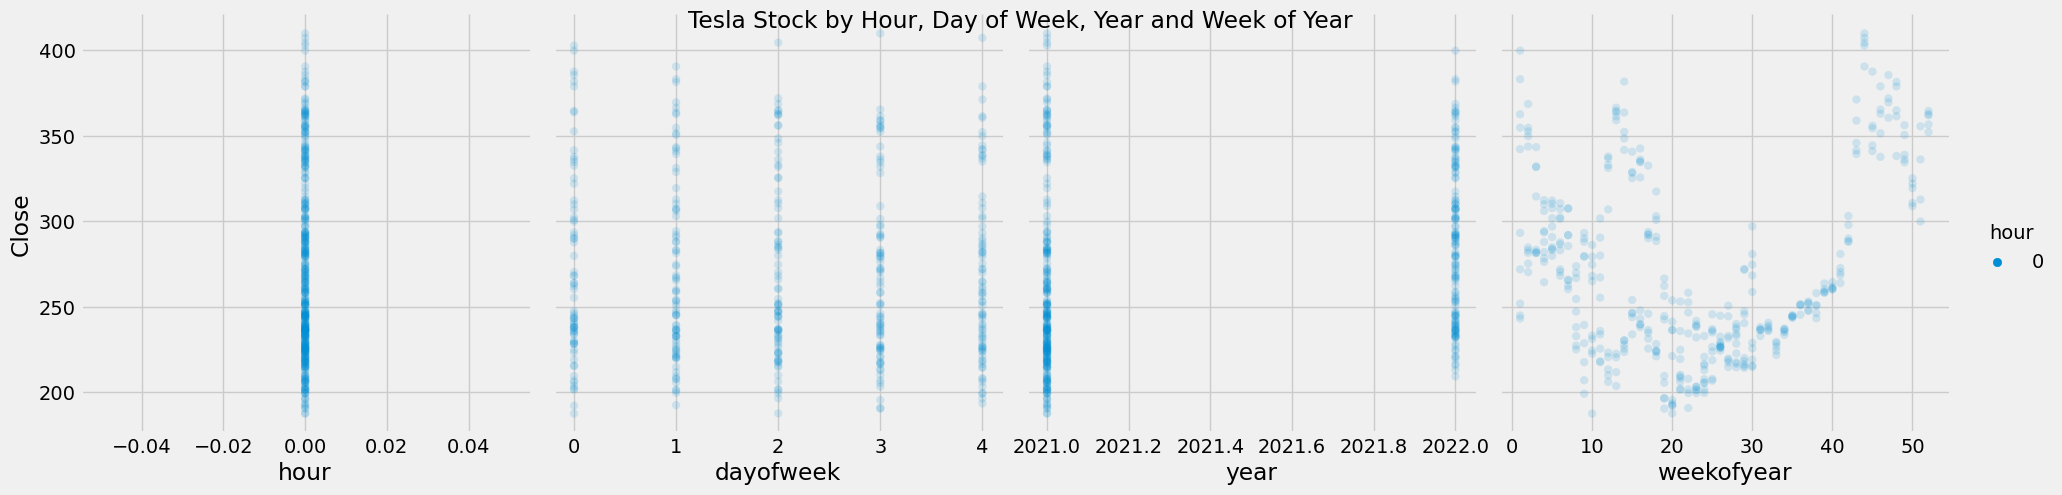

In [76]:
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='Close',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Tesla Stock by Hour, Day of Week, Year and Week of Year')
plt.show()

In [77]:
split_date = pd.to_datetime('2021-4-30')
tsla_train = tsla_close.loc[tsla_close.index <= split_date].copy()
tsla_test = tsla_close.loc[tsla_close.index > split_date].copy()

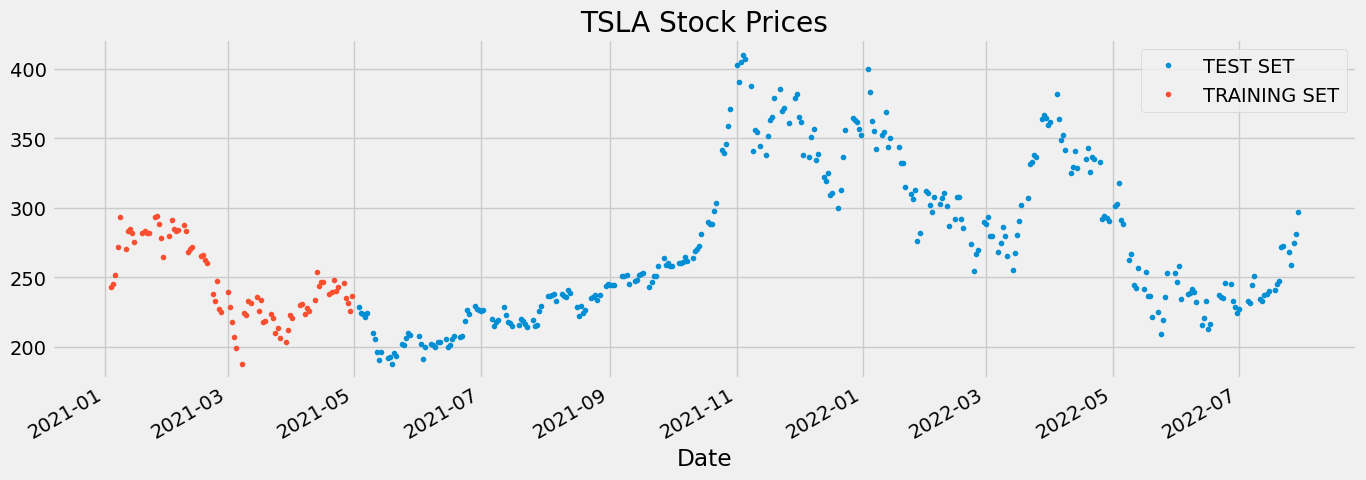

In [78]:
# Plot train and test so you can see where we have split
tsla_test \
    .rename(columns={'Close': 'TEST SET'}) \
    .join(tsla_train.rename(columns={'Close': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15, 5), title='TSLA Stock Prices', style='.')
plt.show()


In [79]:
# Format data for prophet model using ds and y
tsla_train.reset_index() \
    .rename(columns={'Date':'ds',
                     'Close':'y'}).head()

,ds,y
0,2021-01-04,243.256668
1,2021-01-05,245.036667
2,2021-01-06,251.993332
3,2021-01-07,272.013336
4,2021-01-08,293.339996


In [80]:
# Format data for prophet model using ds and y
tsla_test.reset_index() \
    .rename(columns={'Date':'ds',
                     'Close':'y'}).head()

,ds,y
0,2021-05-03,228.300003
1,2021-05-04,224.533340
2,2021-05-05,223.646667
3,2021-05-06,221.179993
4,2021-05-07,224.123337


In [81]:
# Assuming tsla_data_reset is the DataFrame obtained from the previous modification
model = Prophet()
model.fit(tsla_train.reset_index().rename(columns={'Date':'ds','Close':'y'}))

16:15:41 - cmdstanpy - INFO - Chain [1] start processing
16:15:41 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
# Predict on training set with model
tsla_test_fcst = model.predict(tsla_test.reset_index().rename(columns={'Date':'ds','Close':'y'}))

In [83]:
tsla_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-03,119.067988,223.463461,254.224858,119.026951,119.108483,119.952821,119.952821,119.952821,119.952821,119.952821,119.952821,0.0,0.0,0.0,239.020810
1,2021-05-04,119.542049,228.020858,259.575405,119.332232,119.726695,124.058054,124.058054,124.058054,124.058054,124.058054,124.058054,0.0,0.0,0.0,243.600103
2,2021-05-05,120.016110,226.987498,258.832785,119.545160,120.456678,123.294150,123.294150,123.294150,123.294150,123.294150,123.294150,0.0,0.0,0.0,243.310261
3,2021-05-06,120.490171,225.727995,255.931976,119.696329,121.238199,121.253854,121.253854,121.253854,121.253854,121.253854,121.253854,0.0,0.0,0.0,241.744025
4,2021-05-07,120.964232,227.654769,257.843214,119.827096,122.094532,121.559284,121.559284,121.559284,121.559284,121.559284,121.559284,0.0,0.0,0.0,242.523516


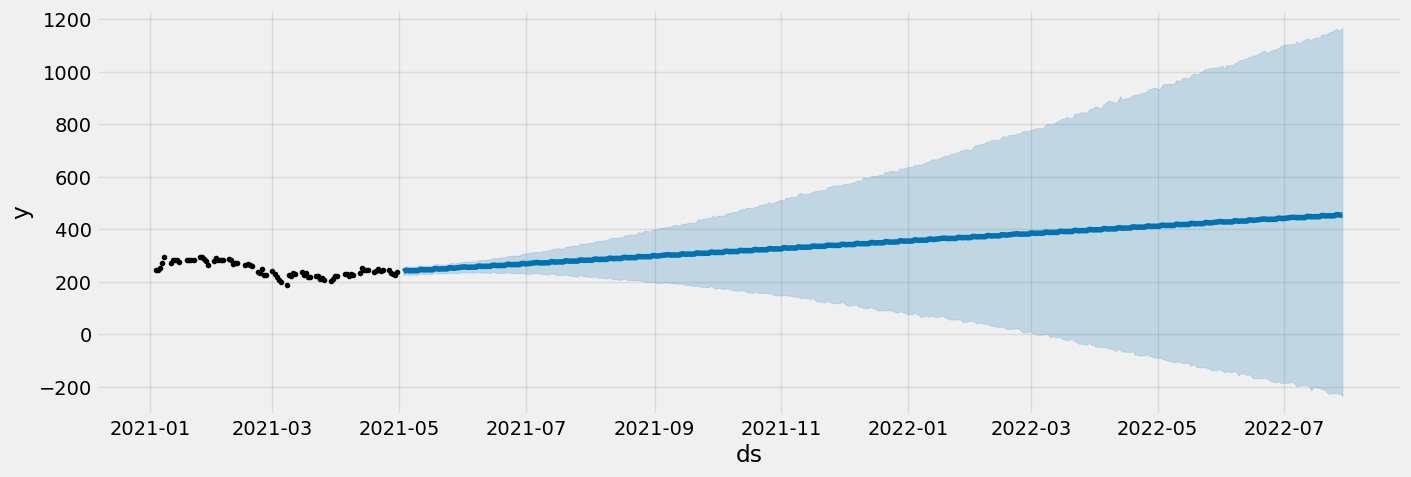

In [84]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(tsla_test_fcst,
                 ax=ax)
plt.show()

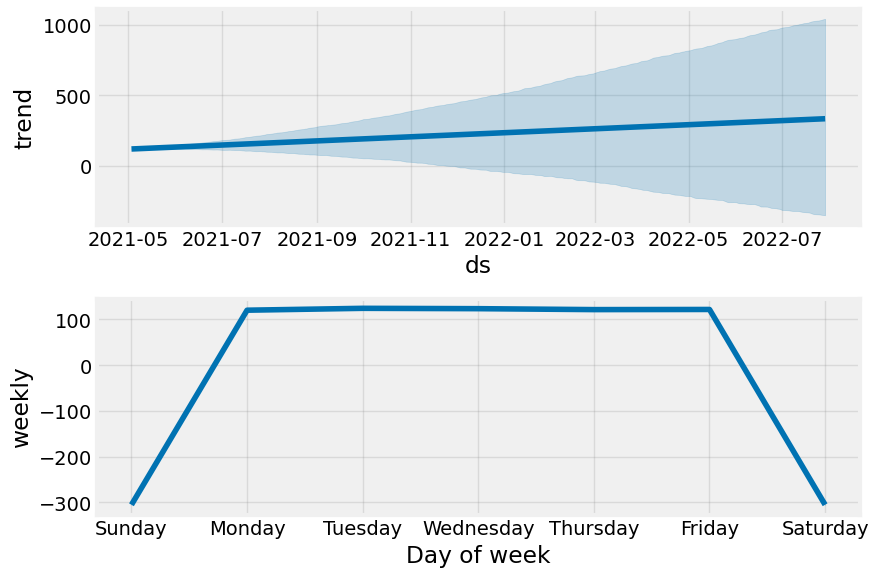

In [85]:
# Plot the components of the model
fig = model.plot_components(tsla_test_fcst)

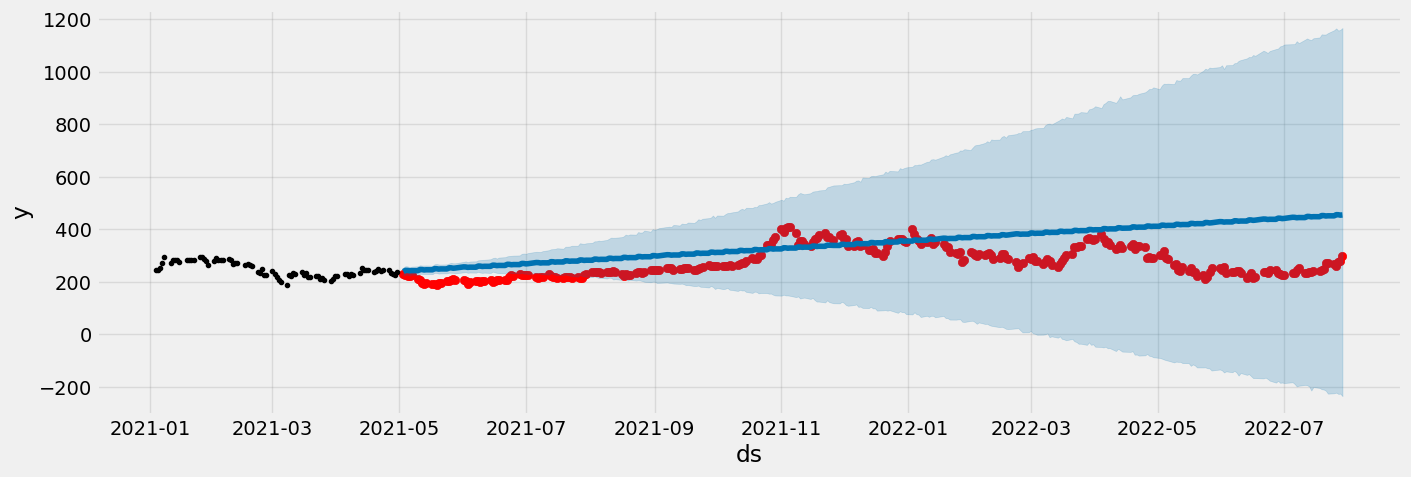

In [86]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(tsla_test.index, tsla_test['Close'], color='r')
fig = model.plot(tsla_test_fcst, ax=ax)

In [87]:
print('Mean Squared Error:\n {}'.format(mean_squared_error(y_true=tsla_test['Close'],
                   y_pred=tsla_test_fcst['yhat'])))

Mean Squared Error:
 9957.252971186992


In [88]:
print("Mean Absolute Error:\n", mean_absolute_error(y_true=tsla_test['Close'],
                   y_pred=tsla_test_fcst['yhat']))

Mean Absolute Error:
 79.56914512314232


In [89]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute Percentage Error:\n",mean_absolute_percentage_error(y_true=tsla_test['Close'],
                   y_pred=tsla_test_fcst['yhat']))

Mean Absolute Percentage Error:
 31.376084143059284


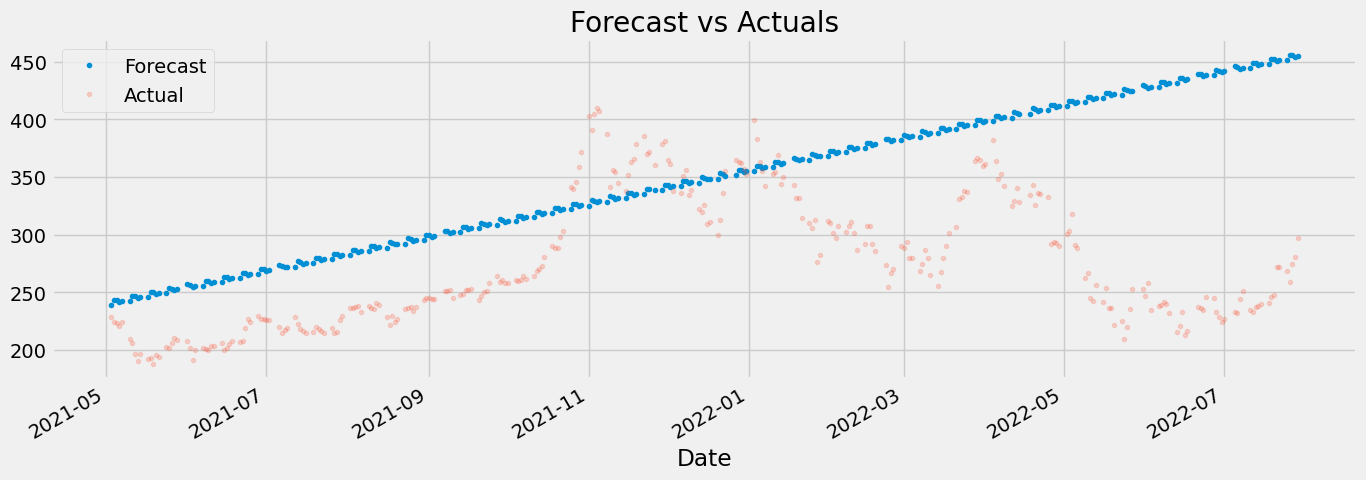

In [90]:
ax = tsla_test_fcst.set_index('ds')['yhat'].plot(figsize=(15, 5),
                                                 lw=0,
                                                 style='.')
tsla_test['Close'].plot(ax=ax,
                          style='.',
                          lw=0,
                          alpha=0.2)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show()

## DART

## ACF and PACF

### Importing Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,4)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [94]:
tsla_close

,Close
Date,
2021-01-04,243.256668
2021-01-05,245.036667
2021-01-06,251.993332
2021-01-07,272.013336
2021-01-08,293.339996
...,...
2022-07-25,268.433319
2022-07-26,258.859985
2022-07-27,274.820007


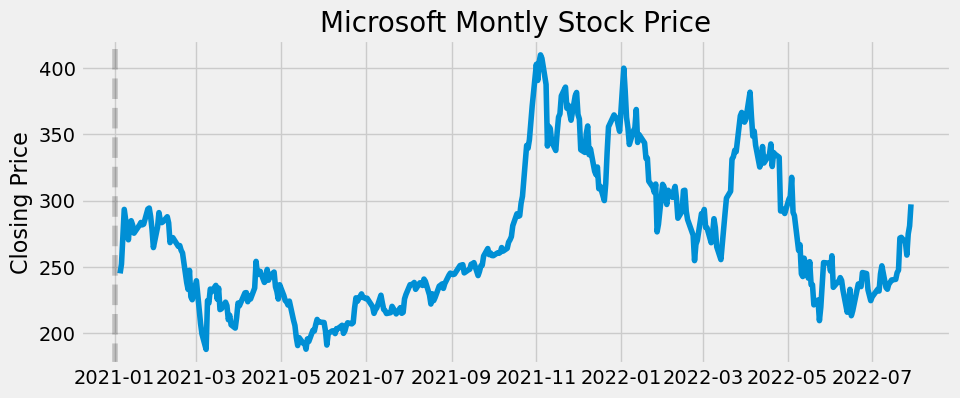

In [106]:
plt.plot(tsla_close.Close)
plt.title('Microsoft Montly Stock Price', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 16)
for year in range(2021,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Based on the graph, Data is not stationary and there s definetly a upwards trend over the time as the economy got better from 2015 to 2020.

Its not stationary - centered around some number, the volatility is not changing over time and there is n seasonal component

Action - First difference

### Data Transformation - First Difference

In [97]:
tsla_close['first_diff'] = tsla_close.Close.pct_change()
tsla_close.dropna(inplace = True)

In [98]:
tsla_close

,Close,first_diff
Date,,
2021-01-05,245.036667,0.007317
2021-01-06,251.993332,0.028390
2021-01-07,272.013336,0.079447
2021-01-08,293.339996,0.078403
2021-01-11,270.396667,-0.078214
...,...,...
2022-07-25,268.433319,-0.013995
2022-07-26,258.859985,-0.035664
2022-07-27,274.820007,0.061655


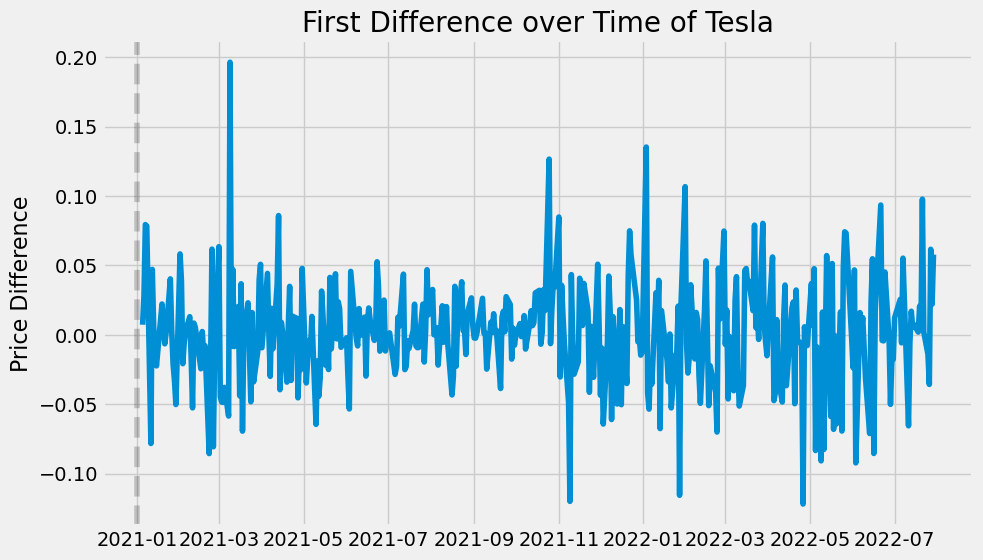

In [100]:
plt.figure(figsize=(10,6))
plt.plot(tsla_close.first_diff)
plt.title('First Difference over Time of Tesla', fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2021,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Volotility is still up in the air, there is perios of higher volotility than others and doesn't look like there is strong seasonal componenets.

This is more robust testing and it's good to plot af and pacf then this.

CLearly non - staitionary data.

### ACF

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x600 with 0 Axes>

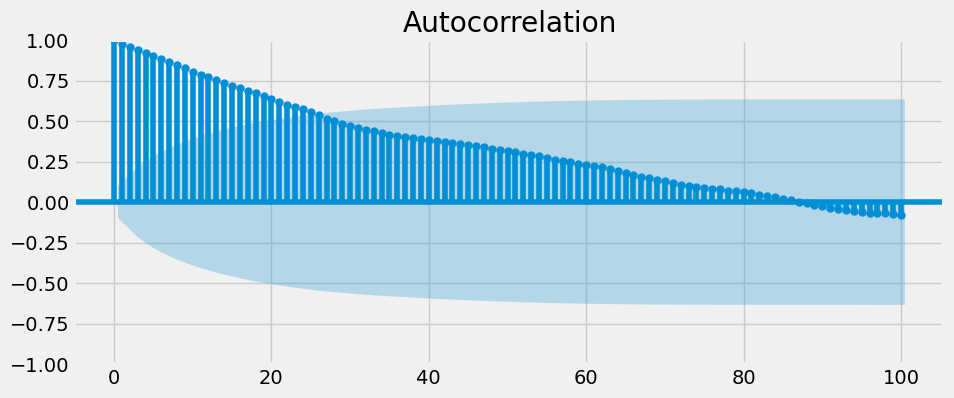

In [103]:
plt.figure(figsize=(10,6))
acf_plot = plot_acf(tsla_close.Close, lags=100)

Any good insights from ACF, 

Based on the **decaying ACF**, we can say that the stock is dealing with **auto regressive process**. AR model (auto regressive model) we would expect a ACF (auto correlation function) to exhibit a diminishing behaviour over time.

For **Moving Average process**, we would get a different signature, we would get a **few strong lags** and then it would just **shut off**.

ACF is not useful in stock data and the lags are high

<Figure size 1000x400 with 0 Axes>

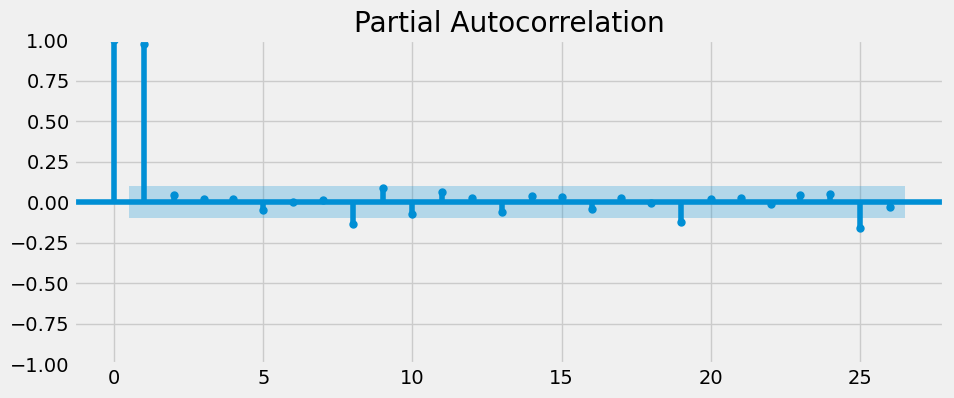

In [104]:
plt.figure(figsize=(10,4))
pacf_plot = plot_pacf(tsla_close.Close)

No strong evidence

### ACF First Difference

<Figure size 1000x600 with 0 Axes>

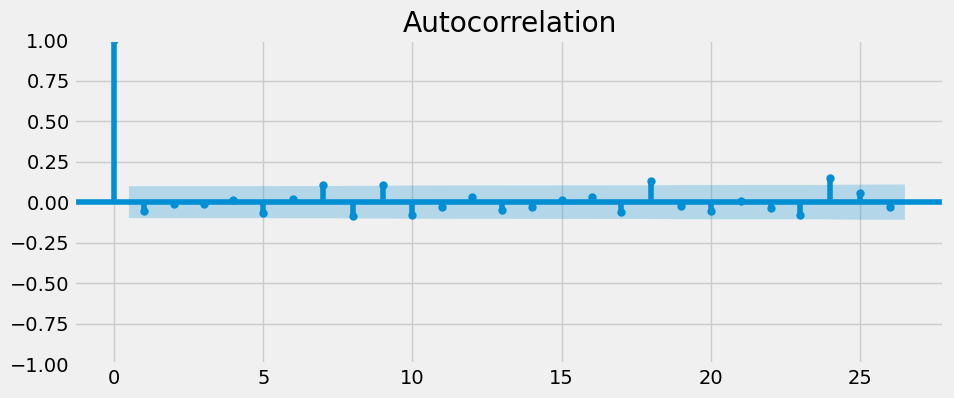

In [107]:
plt.figure(figsize=(10,6))
pacf_plot = plot_acf(tsla_close.first_diff)

may be 1, 2 but no strong evidence

### PACF First Difference

<Figure size 1000x600 with 0 Axes>

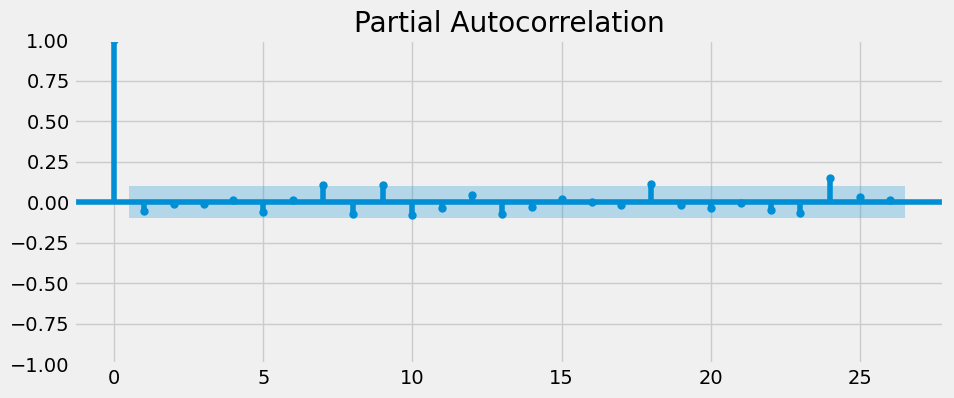

In [108]:
plt.figure(figsize=(10,6))
pacf_plot = plot_pacf(tsla_close.first_diff)

Why stock prices are difficult to predict, PACF and ACF are not that useful for stock prices

if for MA, we can use 1, 2, 5, 7

## Dickey-Fuller test

In [109]:
from statsmodels.tsa.stattools import adfuller

In [110]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [111]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

Text(0.5, 1.0, 'Stationary AR(1) Process')

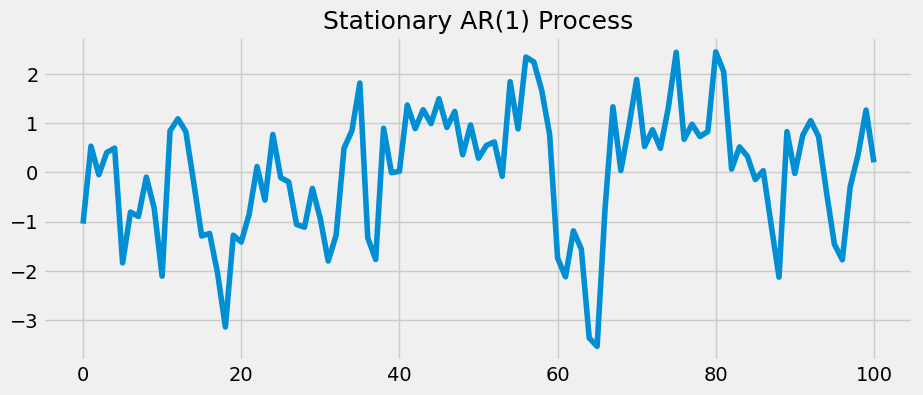

In [112]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [113]:
perform_adf_test(ar_1_process)

ADF Statistic: -5.002214
p-value: 0.000022


p-value is less than 0.05, strong evidence to reject null hypothesis, mean the data is stationary

In [114]:
# perform_adf_test(np.array(MSFT_data.first_diff))

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

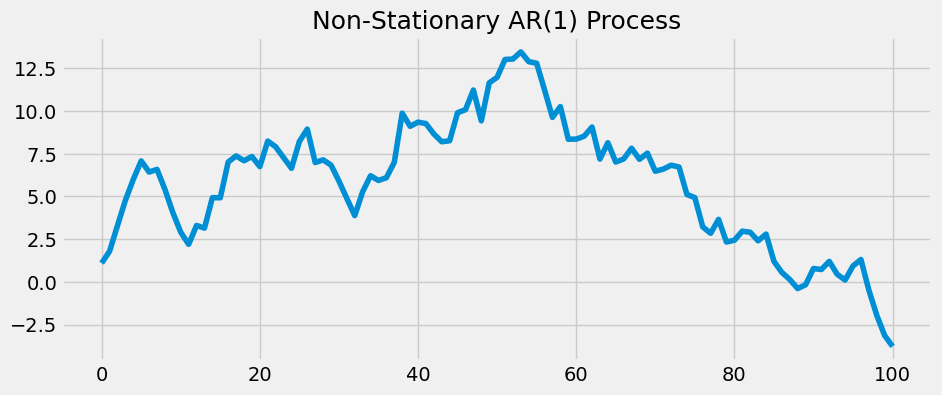

In [115]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [116]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -0.433342
p-value: 0.904381


high p-value so evidence to not reject null value, data is not stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

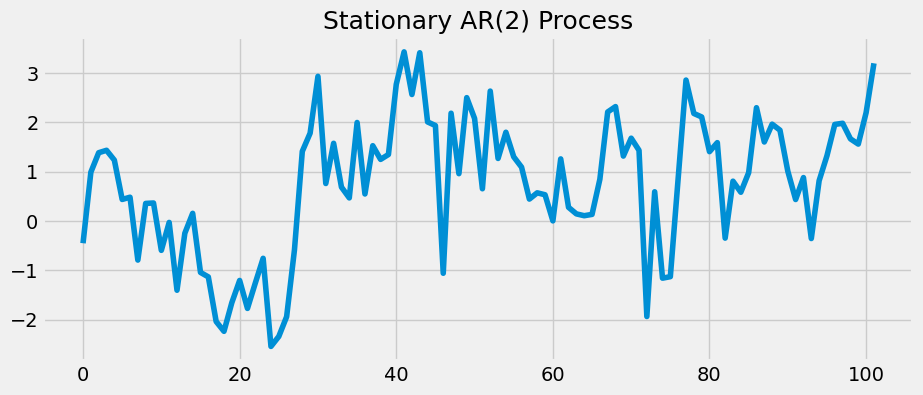

In [117]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [118]:
perform_adf_test(ar_2_process)

ADF Statistic: -1.826608
p-value: 0.367334


phi1 = .5 and phi2 = .3
according to p-value series is stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

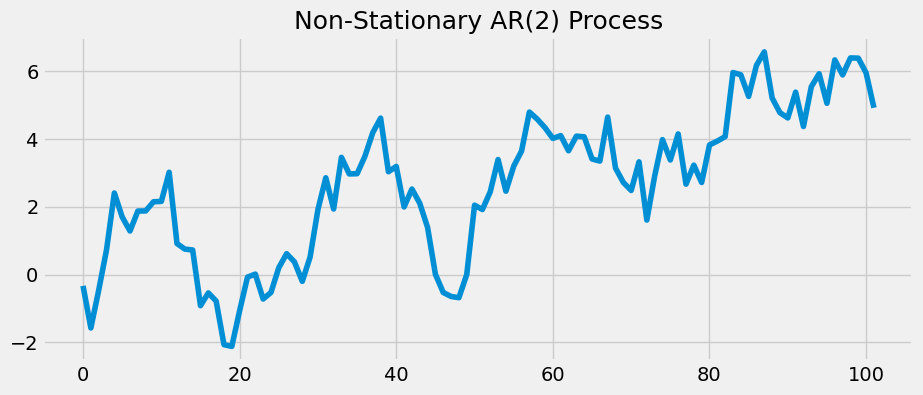

In [119]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [120]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -2.124709
p-value: 0.234696


coefficient phi1 and phi2 sum up to one so not stationary, high and low values, with p-value also clearly not stationary

In [121]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import yfinance as yf

# Download historical stock price data
symbol = 'AAPL'  # Replace with your desired stock symbol
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Extract 'Close' prices
close_prices = stock_data['Close']

# Perform Dickey-Fuller test
result = adfuller(close_prices, autolag='AIC')

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is non-stationary.")


[*********************100%%**********************]  1 of 1 completed
ADF Statistic: -0.14401429425561593
p-value: 0.9448742163911759
Critical Values: {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}
Fail to reject the null hypothesis: The data is non-stationary.


In [124]:
close_prices

Date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: Close, Length: 253, dtype: float64

In [125]:
tsla_close

,Close,first_diff
Date,,
2021-01-05,245.036667,0.007317
2021-01-06,251.993332,0.028390
2021-01-07,272.013336,0.079447
2021-01-08,293.339996,0.078403
2021-01-11,270.396667,-0.078214
...,...,...
2022-07-25,268.433319,-0.013995
2022-07-26,258.859985,-0.035664
2022-07-27,274.820007,0.061655


In [128]:
close_prices

Date
2021-01-05    245.036667
2021-01-06    251.993332
2021-01-07    272.013336
2021-01-08    293.339996
2021-01-11    270.396667
                 ...    
2022-07-25    268.433319
2022-07-26    258.859985
2022-07-27    274.820007
2022-07-28    280.899994
2022-07-29    297.149994
Name: Close, Length: 395, dtype: float64

In [138]:
tsla_data['Close']

Date
2021-01-04    243.256668
2021-01-05    245.036667
2021-01-06    251.993332
2021-01-07    272.013336
2021-01-08    293.339996
                 ...    
2022-07-25    268.433319
2022-07-26    258.859985
2022-07-27    274.820007
2022-07-28    280.899994
2022-07-29    297.149994
Name: Close, Length: 396, dtype: float64

In [137]:
stock_data['Close']

Date
2020-01-02     28.684000
2020-01-03     29.534000
2020-01-06     30.102667
2020-01-07     31.270666
2020-01-08     32.809334
                 ...    
2020-12-24    220.589996
2020-12-28    221.229996
2020-12-29    221.996674
2020-12-30    231.593338
2020-12-31    235.223328
Name: Close, Length: 253, dtype: float64

In [140]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Function to check stationarity using Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Reject the null hypothesis: The data is stationary.")
    else:
        print("Fail to reject the null hypothesis: The data is non-stationary.")

# Extract 'Close' prices
close_prices = tsla_data['Close']

# Check stationarity
check_stationarity(close_prices)

# If the data is non-stationary, you can try differencing
# For example, compute the first difference
first_difference = close_prices.diff().dropna()

# Check stationarity of differenced series
check_stationarity(first_difference)

# Fit ARIMA model on differenced series
order = (1, 0, 0)  # You may need to adjust the order based on the ACF and PACF plots
arima_model = ARIMA(first_difference, order=order)
arima_result = arima_model.fit()

# Print ARIMA model summary
print(arima_result.summary())


ADF Statistic: -2.0581761020790825
p-value: 0.26166116765203706
Critical Values: {'1%': -3.447014064067954, '5%': -2.8688850015516016, '10%': -2.5706826870693797}
Fail to reject the null hypothesis: The data is non-stationary.
ADF Statistic: -6.125022359904873
p-value: 8.670828361451554e-08
Critical Values: {'1%': -3.4474498334928687, '5%': -2.8690765390453703, '10%': -2.570784795075055}
Reject the null hypothesis: The data is stationary.
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  395
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1501.459
Date:                Mon, 25 Mar 2024   AIC                           3008.918
Time:                        16:30:06   BIC                           3020.855
Sample:                             0   HQIC                          3013.647
                                - 395                                         
Cova

## AR Model

In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## ARIMA Model

### Importing Libraries

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# train and test split
diff_train_len = int(len(diff_tsla)*0.80)
diff_train = diff_tsla[:diff_train_len]
diff_test = diff_tsla[diff_train_len:]

In [9]:
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [10]:
ma_model = ARIMA(diff_train, order =(0,0,8))
ma_result = ma_model.fit()

/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# prediction
ma_pred = ma_result.predict(start, end)
ma_pred.index = diff_test.index

/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


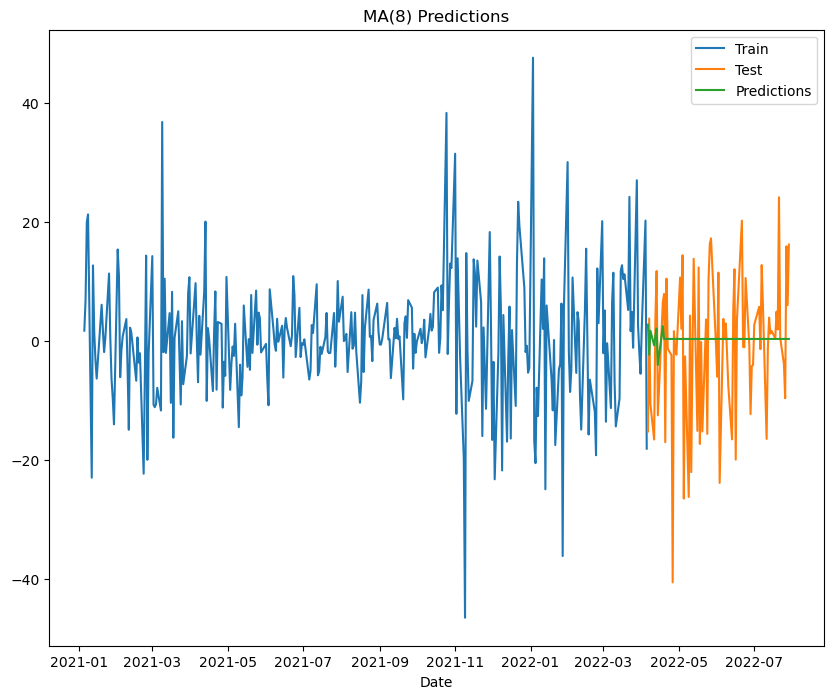

In [12]:
plt.figure(figsize=(10, 8))
plt.title('MA(8) Predictions')
plt.plot(diff_train, label='Train')
plt.plot(diff_test, label='Test')
plt.plot(ma_pred, label='Predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Assuming diff_test and ma_pred are your actual values
# Calculate Mean Squared Error (MSE)
ARIMA_mse = mean_squared_error(diff_test, ma_pred)

# Calculate Mean Absolute Error (MAE)
ARIMA_mae = mean_absolute_error(diff_test, ma_pred)

# Calculate Root Mean Squared Error (RMSE)
ARIMA_rmse = np.sqrt(ARIMA_mse)

# Create a table
metrics_data = {
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'],
    'Value': [ARIMA_mse, ARIMA_mae, ARIMA_rmse]
}

metrics_table = pd.DataFrame(metrics_data)
print(metrics_table)


                           Metric       Value
0        Mean Squared Error (MSE)  146.435772
1       Mean Absolute Error (MAE)    9.065925
2  Root Mean Squared Error (RMSE)   12.101065


## grangercausality*

In [151]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Define the ticker symbols for TSLA and AAPL
ticker_symbols = ['TSLA', 'AAPL']

# Fetch historical stock price data from Yahoo Finance for TSLA
tsla_data = yf.download('TSLA', start='2017-01-01', end='2021-12-31')

# Fetch historical stock price data from Yahoo Finance for AAPL
aapl_data = yf.download('AAPL', start='2017-01-01', end='2021-12-31')

# Extract closing prices for TSLA and AAPL
tsla_prices = tsla_data['Adj Close']
aapl_prices = aapl_data['Adj Close']

# Perform Granger causality test
max_lag = 5  # Set the maximum lag to consider
test_result = grangercausalitytests(pd.DataFrame({'TSLA': tsla_prices, 'AAPL': aapl_prices}), max_lag, verbose=True)

# Print the test results
for lag in range(1, max_lag + 1):
    print(f"\nGranger causality test results for lag {lag}:")
    print(test_result[lag])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2032  , p=0.0074  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=7.2204  , p=0.0072  , df=1
likelihood ratio test: chi2=7.1997  , p=0.0073  , df=1
parameter F test:         F=7.2032  , p=0.0074  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.9963  , p=0.0001  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=18.0645 , p=0.0001  , df=2
likelihood ratio test: chi2=17.9358 , p=0.0001  , df=2
parameter F test:         F=8.9963  , p=0.0001  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.0248  , p=0.0004  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=18.1759 , p=0.0004  , df=3
likelihood ratio test: chi2=18.0455 , p=0.0004  , df=3
parameter F test:       

[*********************100%%**********************]  1 of 1 completed

16:41:04 - cmdstanpy - INFO - Chain [1] start processing
16:41:04 - cmdstanpy - INFO - Chain [1] done processing


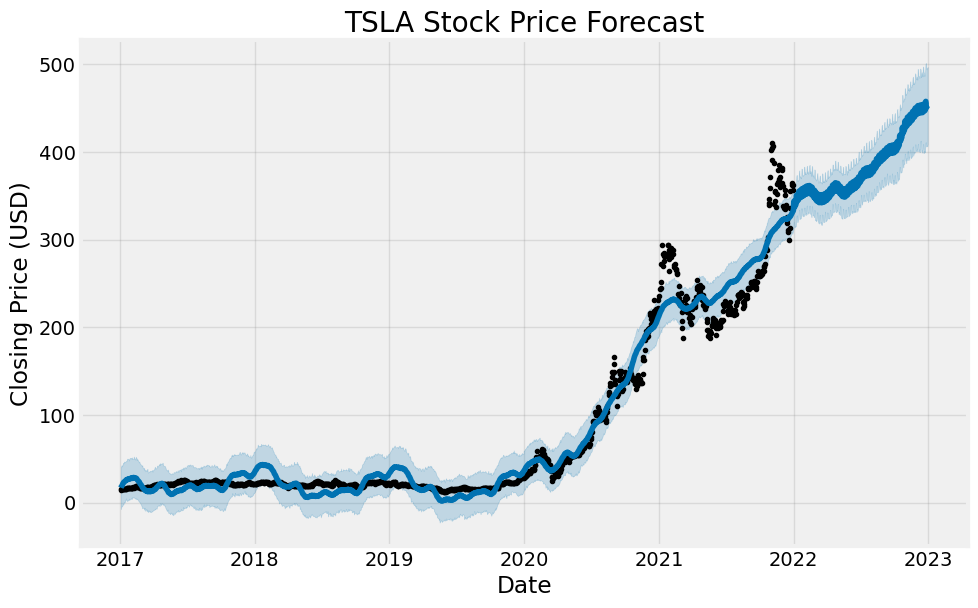

In [153]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock price data from Yahoo Finance for TSLA
tsla_data = yf.download('TSLA', start='2017-01-01', end='2021-12-31')

# Reset index and rename columns to 'ds' and 'y' as required by Prophet
tsla_data.reset_index(inplace=True)
tsla_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(tsla_data)

# Make future dataframe for forecasting
future = model.make_future_dataframe(periods=365)  # Forecasting for an additional year

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Closing Price (USD)')
plt.title('TSLA Stock Price Forecast')
plt.show()


In [154]:
import yfinance as yf
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock price data from Yahoo Finance for TSLA
tsla_data = yf.download('TSLA', start='2017-01-01', end='2021-12-31')

# Reset index and rename columns to 'ds' and 'y' as required by Prophet
tsla_data.reset_index(inplace=True)
tsla_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(tsla_data)

# Make future dataframe for forecasting
future = model.make_future_dataframe(periods=365)  # Forecasting for an additional year

# Make predictions
forecast = model.predict(future)

# Plot the forecast
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(tsla_data['ds'], tsla_data['y'], color='b', label='Actual')  # Actual data
plt.plot(forecast['ds'], forecast['yhat'], color='r', linestyle='--', label='Forecast')  # Forecasted data
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgray', alpha=0.2)  # Confidence interval
plt.xlabel('Date', fontsize=12)  # X-axis label
plt.ylabel('Closing Price (USD)', fontsize=12)  # Y-axis label
plt.title('TSLA Stock Price Forecast', fontsize=14)  # Title
plt.legend(loc='upper left')  # Legend position
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.xticks(fontsize=10)  # X-axis tick font size
plt.yticks(fontsize=10)  # Y-axis tick font size
plt.tight_layout()  # Adjust layout
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

In [155]:
import yfinance as yf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.arima.model import ARIMA

# Fetch historical stock price data from Yahoo Finance for TSLA and AAPL
tsla_data = yf.download('TSLA', start='2017-01-01', end='2021-12-31')['Adj Close']
aapl_data = yf.download('AAPL', start='2017-01-01', end='2021-12-31')['Adj Close']

# Perform Granger causality test
max_lag = 5  # Set the maximum lag to consider
test_result_tsla_aapl = grangercausalitytests(pd.DataFrame({'TSLA': tsla_data, 'AAPL': aapl_data}), max_lag, verbose=True)

# Fit ARIMA model to TSLA data
order = (1, 1, 1)  # ARIMA order
model_tsla = ARIMA(tsla_data, order=order)
fit_tsla = model_tsla.fit()

# Make ARIMA forecast for TSLA
forecast_tsla = fit_tsla.forecast(steps=365)

# Print ARIMA forecast
print("ARIMA Forecast for TSLA:")
print(forecast_tsla)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2032  , p=0.0074  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=7.2204  , p=0.0072  , df=1
likelihood ratio test: chi2=7.1997  , p=0.0073  , df=1
parameter F test:         F=7.2032  , p=0.0074  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.9962  , p=0.0001  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=18.0642 , p=0.0001  , df=2
likelihood ratio test: chi2=17.9356 , p=0.0001  , df=2
parameter F test:         F=8.9962  , p=0.0001  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.0248  , p=0.0005  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=18.1757 , p=0.0004  , df=3
likelihood ratio test: chi2=18.0453 , p=0.0004  , df=3
parameter F test:       

In [157]:
import yfinance as yf
from prophet import Prophet
from statsmodels.tsa.stattools import grangercausalitytests

# Fetch historical stock price data from Yahoo Finance for TSLA and AAPL
tsla_data = yf.download('TSLA', start='2017-01-01', end='2021-12-31')
aapl_data = yf.download('AAPL', start='2017-01-01', end='2021-12-31')

# Perform Granger causality test
max_lag = 5  # Set the maximum lag to consider
test_result_tsla_aapl = grangercausalitytests(pd.DataFrame({'TSLA': tsla_data['Adj Close'], 'AAPL': aapl_data['Adj Close']}), max_lag, verbose=True)

# Initialize Prophet model for TSLA
model_tsla = Prophet()
tsla_data.reset_index(inplace=True)
tsla_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)
model_tsla.fit(tsla_data)

# Make future dataframe for forecasting
future_tsla = model_tsla.make_future_dataframe(periods=365)  # Forecasting for an additional year

# Make Prophet forecast for TSLA
forecast_tsla = model_tsla.predict(future_tsla)

# Print Prophet forecast
print("Prophet Forecast for TSLA:")
print(forecast_tsla[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

16:45:11 - cmdstanpy - INFO - Chain [1] start processing




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2032  , p=0.0074  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=7.2204  , p=0.0072  , df=1
likelihood ratio test: chi2=7.1998  , p=0.0073  , df=1
parameter F test:         F=7.2032  , p=0.0074  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.9962  , p=0.0001  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=18.0642 , p=0.0001  , df=2
likelihood ratio test: chi2=17.9356 , p=0.0001  , df=2
parameter F test:         F=8.9962  , p=0.0001  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.0248  , p=0.0005  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=18.1757 , p=0.0004  , df=3
likelihood ratio test: chi2=18.0453 , p=0.0004  , df=3
parameter F test:         F=6.0248  , p=0.0005  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.4083  , p=0

16:45:11 - cmdstanpy - INFO - Chain [1] done processing


Prophet Forecast for TSLA:
             ds        yhat  yhat_lower  yhat_upper
0    2017-01-03   16.954137   -4.914106   40.945038
1    2017-01-04   17.983205   -3.966023   40.071682
2    2017-01-05   18.606740   -5.092876   42.691071
3    2017-01-06   19.076434   -3.602141   41.487311
4    2017-01-09   22.165000   -1.297454   45.889457
...         ...         ...         ...         ...
1618 2022-12-26  450.314561  404.848475  494.906960
1619 2022-12-27  450.851997  405.782754  496.161003
1620 2022-12-28  451.869458  406.706079  499.996181
1621 2022-12-29  452.550471  404.645411  497.876503
1622 2022-12-30  453.146899  406.790552  498.934015

[1623 rows x 4 columns]


`grangercausalitytests` is a function provided by the `statsmodels` library in Python for testing Granger causality between two time series variables. Here's what it does in 5 points:

1. **Test for Causality**: It tests whether one time series variable Granger-causes the other, implying that the past values of one variable provide information that helps predict the future values of the other variable better than using only past values of the other variable.

2. **Lag Structure Analysis**: It examines the relationship between the variables at different lag lengths. The user can specify the maximum lag length to consider in the analysis.

3. **Statistical Significance Testing**: It provides several statistical tests to assess the significance of the relationship between the variables, including F-tests, chi-squared tests, and likelihood ratio tests.

4. **Output Interpretation**: It returns the test results for each lag length considered, including test statistics, p-values, and degrees of freedom. Users can analyze these results to determine whether there is evidence of Granger causality and at which lag lengths it occurs.

5. **Usage Flexibility**: It offers flexibility in usage by allowing users to specify the maximum lag length, control verbosity for output, and customize test parameters. Users can tailor the analysis according to the specific requirements of their research or modeling tasks.

Overall, `grangercausalitytests` is a useful tool for assessing the causal relationship between time series variables, providing insights into their dynamic interactions and predictive capabilities.

## GARCH Model

In [183]:
!pip install arch

In [185]:
tsla_close['first_diff']

,Close,first_diff
Date,,
2021-01-05,245.036667,0.007317
2021-01-06,251.993332,0.028390
2021-01-07,272.013336,0.079447
2021-01-08,293.339996,0.078403
2021-01-11,270.396667,-0.078214
...,...,...
2022-07-25,268.433319,-0.013995
2022-07-26,258.859985,-0.035664
2022-07-27,274.820007,0.061655


The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model is a statistical method used in econometrics and financial modeling to analyze and forecast time series data, particularly in the field of volatility modeling.

AR: The autoregressive component of the GARCH model captures the dependence of the current volatility on past volatility.

ARCH: ARCH refers to the phenomenon where the variance of a time series is not constant over time, but rather exhibits volatility clustering.

G: including not only lagged squared errors but also lagged conditional variances in the model

Heteroskedasticity is a statistical term that refers to the situation where the variability of a variable is not constant across the range of values of another variable.

Homoskedasticity is a statistical term used to describe a situation where the variance of a variable is constant across all levels or values of another variable.

In [186]:
returns = 100 * tsla_close['first_diff'].dropna()

In [187]:
# GARCH(3,3)
from arch import arch_model

model = arch_model(returns, p=3, q=3)

In [188]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 1229.1833319015104
Iteration:      2,   Func. Count:     23,   Neg. LLF: 1712.2847427181446
Iteration:      3,   Func. Count:     34,   Neg. LLF: 1660.882867074256
Iteration:      4,   Func. Count:     45,   Neg. LLF: 1087.8340139367729
Iteration:      5,   Func. Count:     55,   Neg. LLF: 1076.2292242455915
Iteration:      6,   Func. Count:     64,   Neg. LLF: 1079.8511573817132
Iteration:      7,   Func. Count:     75,   Neg. LLF: 1074.786231568815
Iteration:      8,   Func. Count:     85,   Neg. LLF: 1087.758193247982
Iteration:      9,   Func. Count:     96,   Neg. LLF: 1076.9355548435358
Iteration:     10,   Func. Count:    106,   Neg. LLF: 1074.1716959111518
Iteration:     11,   Func. Count:    115,   Neg. LLF: 1074.157834406048
Iteration:     12,   Func. Count:    124,   Neg. LLF: 1074.1539719269088
Iteration:     13,   Func. Count:    133,   Neg. LLF: 1074.1537651194521
Iteration:     14,   Func. Count:    142,   Neg. LLF: 1

In [190]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             first_diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1074.15
Distribution:                  Normal   AIC:                           2164.31
Method:            Maximum Likelihood   BIC:                           2196.14
                                        No. Observations:                  395
Date:                Mon, Mar 25 2024   Df Residuals:                      394
Time:                        17:55:36   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2096      0.683      0.307      0.759 [ -1.130,  1.549]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4752      1.860      0.256      0.798 [ -3.170,  4.120]
alpha[1]       0.0000      1.035      0.000      1.000 [ -2.028,  2.028]
alpha[2]       0.1475      0.510      0.289      0.773 [ -0.853,  1.148]
alpha[3]   1.5295e-13      0.848  1.803e-13      1.000 [ -1.663,  1.663]
beta[1]    2.6305e-13      3.411  7.711e-14      1.000 [ -6.686,  6.686]
beta[2]        0.0691      2.319  2.979e-02      0.976 [ -4.477,  4.615]
beta[3]        0.7563      0.970      0.780      0.436 [ -1.145,  2.657]
========================================================================

Covariance estimator: robust
"""

In [191]:
model = arch_model(returns, p=3, q=0)

In [192]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1192.9052617275856
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1567.571021588179
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1093.6878023373065
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1088.8605395480922
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1088.8511582109963
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1088.8492095945776
Iteration:      7,   Func. Count:     48,   Neg. LLF: 1088.849144918834
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1088.8491452358867
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1088.849144918834
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8


In [193]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:             first_diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1088.85
Distribution:                  Normal   AIC:                           2187.70
Method:            Maximum Likelihood   BIC:                           2207.59
                                        No. Observations:                  395
Date:                Mon, Mar 25 2024   Df Residuals:                      394
Time:                        17:56:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1795      0.270      0.665      0.506 [ -0.350,  0.709]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         12.3575      8.309      1.487      0.137    [ -3.928, 28.643]
alpha[1]   5.2720e-14      0.519  1.015e-13      1.000    [ -1.018,  1.018]
alpha[2]       0.1811      0.116      1.556      0.120 [-4.703e-02,  0.409]
alpha[3]       0.0000      0.278      0.000      1.000    [ -0.545,  0.545]
===========================================================================

Covariance estimator: robust
"""

In [194]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [195]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

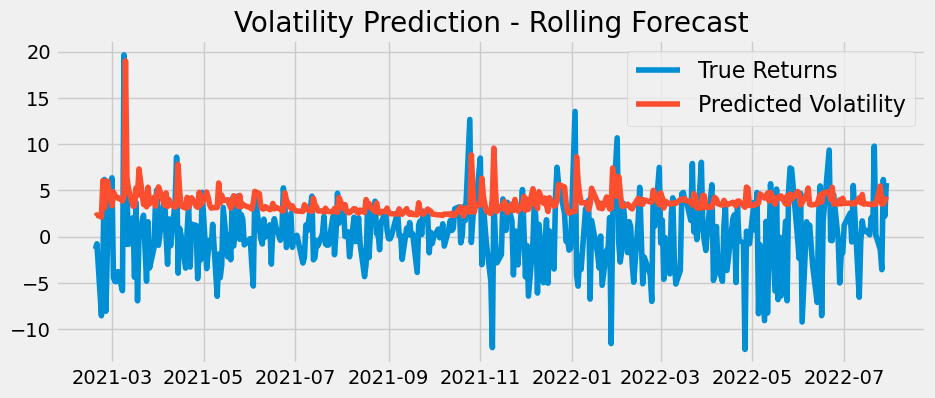

In [196]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [197]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [200]:
pred = model_fit.forecast(horizon=14)
future_dates = [returns.index[-1] + pd.Timedelta(days=i) for i in range(1,15)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 14 Days')

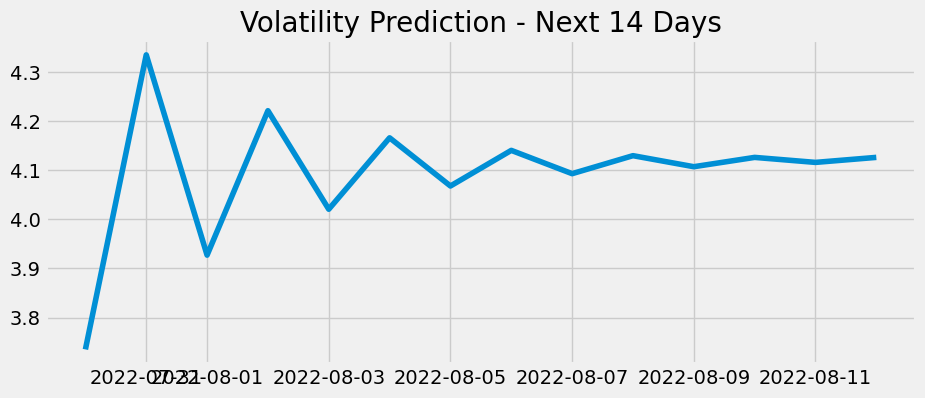

In [201]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 14 Days', fontsize=20)

## NER Model

In [209]:
import spacy

# Load the pre-trained SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# Define the text
text = "Can I invest in Apple Inc. or Tesla stock today?"

# Process the text with the SpaCy NLP pipeline
doc = nlp(text)

# Extract named entities from the processed text
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Filter named entities that are organizations (ORG)
stock_names = [entity[0] for entity in entities if entity[1] == "ORG"]

print(stock_names)  # Output: ['Apple']


['Apple Inc.', 'Tesla']


In [210]:
Sym_Com = pd.read_csv('symbols_valid_meta.csv')[['Symbol','Security Name']]

In [211]:
Sym_Com

,Symbol,Security Name
0,A,"Agilent Technologies, Inc. Common Stock"
1,AA,Alcoa Corporation Common Stock
2,AAAU,Perth Mint Physical Gold ETF
3,AACG,ATA Creativity Global - American Depositary Sh...
4,AADR,AdvisorShares Dorsey Wright ADR ETF
...,...,...
8044,ZUO,"Zuora, Inc. Class A Common Stock"
8045,ZVO,Zovio Inc. - Common Stock
8046,ZYME,Zymeworks Inc. Common Shares
8047,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock"


In [212]:
row = Sym_Com[Sym_Com['Security Name'].str.contains('Apple Inc.', case=False)]
row.loc[]

In [213]:
row

,Symbol,Security Name
12,AAPL,Apple Inc. - Common Stock


In [182]:
Sym_Com.loc[Sym_Com['Symbol'] == 'HD']

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
3279,Y,HD,"Home Depot, Inc. (The) Common Stock",N,,N,100.0,N,NaN,HD,HD,N


When user asks a question about stock investment, i want to run the garch and prophet models for last one year from that date and get the forecasting output, if it says a buy signal, will recommendt to buy the stock

Look at what we get from the data, retrivalQA, can do predictive analytics